In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import os
import csv
import numpy as np
from matplotlib import pyplot as plt

In [78]:
# Process shapes data
raw_shapes = []
directory = 'Dataset/shape'
for file in sorted(os.listdir(directory)):
    filepath = os.path.join(directory, file)
    with open(filepath, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)
        raw_shapes.append(data)

clean_shapes = []
for shape in raw_shapes:
    clean_shape = pd.DataFrame(shape).iloc[1:-1, 1:-2]
    clean_shapes.append(clean_shape.transpose())


# Process vertical data
raw_verticals = []
directory = 'Dataset/vertical'
for file in sorted(os.listdir(directory)):
    filepath = os.path.join(directory, file)
    with open(filepath, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)
        raw_verticals.append(data)

clean_verticals = []
for vertical in raw_verticals:
    clean_vertical = pd.DataFrame(vertical).iloc[1:-1, 1:-2]
    clean_verticals.append(clean_vertical.transpose())


# Process horizontal data
raw_horizontals = []
directory = 'Dataset/horizontal'
for file in sorted(os.listdir(directory)):
    filepath = os.path.join(directory, file)
    with open(filepath, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)
        raw_horizontals.append(data)

clean_horizontals = []
for horizontal in raw_horizontals:
    clean_horizontal = pd.DataFrame(horizontal).iloc[1:-1, 1:-2]
    clean_horizontals.append(clean_horizontal.transpose())


# Calculate total velocity
total_velocities = []
for i in range(len(clean_shapes)):
    total_velocity = np.sqrt(np.square(clean_verticals[i].astype(float)) + np.square(clean_horizontals[i].astype(float)))
    total_velocities.append(total_velocity)


In [79]:
# Create training dataset
temp = []
for i in range(len(clean_shapes)):
    input_example = clean_shapes[i].values.astype(float)
    output_example = total_velocities[i].values.astype(float)
    temp.append((input_example, output_example))

data_tensor = torch.FloatTensor(temp)

# Split training dataset into training, validation, and test
training_size = int(0.6 * len(data_tensor))
validation_size = int(0.2 * len(data_tensor))
test_size = len(data_tensor) - training_size - validation_size

training_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(data_tensor, [training_size, validation_size, test_size])


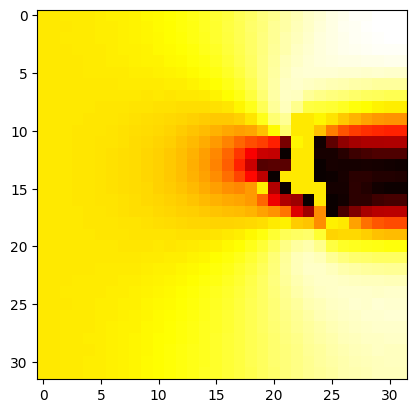

<built-in method type of Tensor object at 0x1350c7b90>


In [80]:
input, output = training_dataset[200]
plt.imshow(output, cmap='hot', interpolation='nearest')
plt.show()
print(input.type)

In [81]:
# Network definition
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU(),
        self.conv3 = nn.ConvTranspose2d(32, 2, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [82]:
class CFD_CNN(nn.Module):
    def __init__(self):
        super(CFD_CNN, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 2, kernel_size=3, stride=1, padding=1),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [83]:
# Initialize the model
model = CFD_CNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [84]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for data in training_dataset:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        tensor_inputs = torch.FloatTensor(inputs).reshape(1, 1, 32, 32)
        tensor_labels = torch.FloatTensor(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(tensor_inputs)
        loss = criterion(outputs, tensor_labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        print(f'[{epoch + 1}, loss: {running_loss / 2000:.3f}')

print('Finished Training')

[1, loss: 0.001
[1, loss: 0.001
[1, loss: 0.002
[1, loss: 0.003
[1, loss: 0.003
[1, loss: 0.004
[1, loss: 0.004
[1, loss: 0.004
[1, loss: 0.005
[1, loss: 0.005
[1, loss: 0.005
[1, loss: 0.005
[1, loss: 0.006
[1, loss: 0.006
[1, loss: 0.006
[1, loss: 0.006
[1, loss: 0.006
[1, loss: 0.007
[1, loss: 0.007
[1, loss: 0.007
[1, loss: 0.007
[1, loss: 0.007
[1, loss: 0.007
[1, loss: 0.007
[1, loss: 0.007
[1, loss: 0.008
[1, loss: 0.008
[1, loss: 0.008
[1, loss: 0.008
[1, loss: 0.008
[1, loss: 0.008
[1, loss: 0.009
[1, loss: 0.009
[1, loss: 0.009
[1, loss: 0.009
[1, loss: 0.009
[1, loss: 0.009
[1, loss: 0.009
[1, loss: 0.009
[1, loss: 0.010
[1, loss: 0.010
[1, loss: 0.010
[1, loss: 0.010
[1, loss: 0.010
[1, loss: 0.010
[1, loss: 0.010
[1, loss: 0.010
[1, loss: 0.011
[1, loss: 0.011
[1, loss: 0.011
[1, loss: 0.011
[1, loss: 0.011
[1, loss: 0.011
[1, loss: 0.011
[1, loss: 0.011
[1, loss: 0.011
[1, loss: 0.011
[1, loss: 0.012
[1, loss: 0.012
[1, loss: 0.012
[1, loss: 0.012
[1, loss: 0.012
[1, loss

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32, 32])) that is different to the input size (torch.Size([1, 2, 32, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[1, loss: 0.014
[1, loss: 0.014
[1, loss: 0.014
[1, loss: 0.014
[1, loss: 0.014
[1, loss: 0.014
[1, loss: 0.014
[1, loss: 0.014
[1, loss: 0.014
[1, loss: 0.014
[1, loss: 0.015
[1, loss: 0.015
[1, loss: 0.015
[1, loss: 0.015
[1, loss: 0.015
[1, loss: 0.015
[1, loss: 0.015
[1, loss: 0.015
[1, loss: 0.015
[1, loss: 0.015
[1, loss: 0.015
[1, loss: 0.016
[1, loss: 0.016
[1, loss: 0.016
[1, loss: 0.016
[1, loss: 0.016
[1, loss: 0.016
[1, loss: 0.016
[1, loss: 0.016
[1, loss: 0.016
[1, loss: 0.016
[1, loss: 0.016
[1, loss: 0.017
[1, loss: 0.017
[1, loss: 0.017
[1, loss: 0.017
[1, loss: 0.017
[1, loss: 0.017
[1, loss: 0.017
[1, loss: 0.017
[1, loss: 0.017
[1, loss: 0.017
[1, loss: 0.017
[1, loss: 0.017
[1, loss: 0.017
[1, loss: 0.017
[1, loss: 0.018
[1, loss: 0.018
[1, loss: 0.018
[1, loss: 0.018
[1, loss: 0.018
[1, loss: 0.018
[1, loss: 0.018
[1, loss: 0.018
[1, loss: 0.018
[1, loss: 0.018
[1, loss: 0.018
[1, loss: 0.018
[1, loss: 0.018
[1, loss: 0.018
[1, loss: 0.019
[1, loss: 0.019
[1, loss

torch.Size([1, 2, 32, 32])


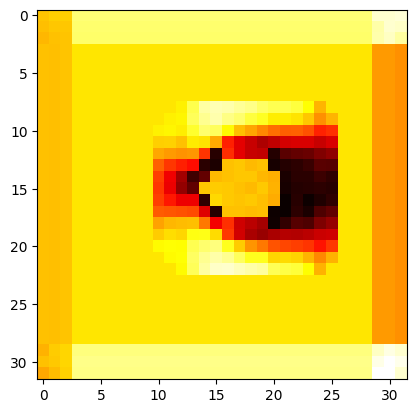

<built-in method type of Tensor object at 0x1350c7b90>


In [85]:
inputs, labels = test_dataset[55]
tensor_inputs = torch.FloatTensor(inputs).reshape(1, 1, 32, 32)
tensor_labels = torch.FloatTensor(labels)

tensor_outputs = model(tensor_inputs)

print(tensor_outputs.shape)

plt.imshow(tensor_outputs[0][1].detach().numpy(), cmap='hot', interpolation='nearest')
plt.show()
print(input.type)



torch.Size([32, 32])


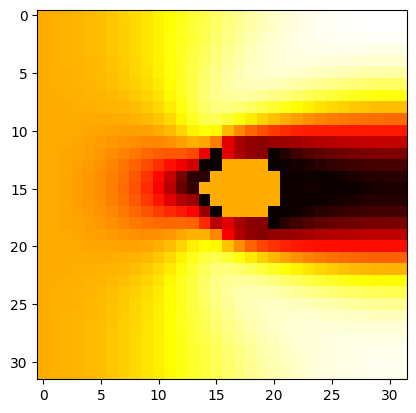

In [86]:
print(tensor_labels.shape)
plt.imshow(tensor_labels.detach().numpy(), cmap='hot', interpolation='nearest')
plt.show()

torch.Size([1, 1, 32, 32])


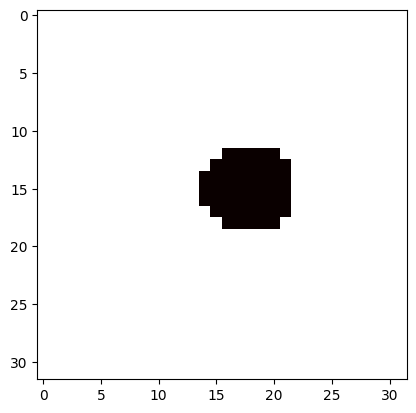

In [87]:
print(tensor_inputs.shape)
plt.imshow(tensor_inputs[0][0].detach().numpy(), cmap='hot', interpolation='nearest')
plt.show()